In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

os.chdir('C:\\Users\\susmitha\\Desktop\\Sush CSE\\Locker\\4-2\\Major Project\\Code\\My Code\\Test - 1\\Predicting-Sales-for-Supermarket')
data = pd.read_csv('train.csv')

C:\Users\susmitha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Transforming Data

Dropping features

In [18]:
transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)

In [19]:
transformed_data.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,5,5263,1,1,0,1
1,5,6064,1,1,0,1
2,5,8314,1,1,0,1
3,5,13995,1,1,0,1
4,5,4822,1,1,0,1


Categorical and Nominal Features

In [20]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [21]:
transformed_data.head()

,Sales,Open,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,5263,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0
1,6064,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0
2,8314,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13995,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0
4,4822,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0


First Prediction

In [22]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 1017209 examples and 15 features.


Training & Cross-Validation

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv
shuffle=True

In [25]:
lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.55 (+/- 0.00)


Visualize Predictions

In [28]:
store_data = data[data.Store==150].sort_values('Date')
lr = LinearRegression()
X_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values
y_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).Sales.values
lr.fit(X_store, y_store)
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values)

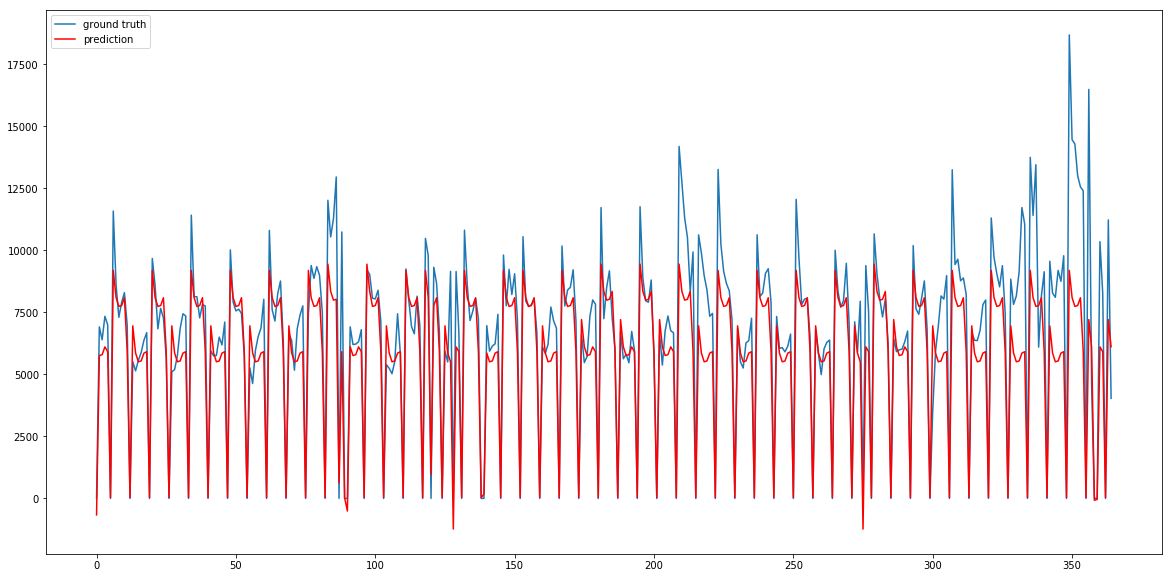

In [29]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales.values[:365], label="ground truth")
plt.plot(y_store_predict[:365], c='r', label="prediction")
plt.legend()